<a href="https://colab.research.google.com/github/sapoepsilon/colorizeBlackandWhite/blob/main/ColoRISE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.chdir('/content')

In [ ]:
!git clone https://github.com/jantic/DeOldify.git DeOldify

Cloning into 'DeOldify'...
remote: Enumerating objects: 2297, done.
remote: Counting objects: 100% (69/69), done.
remote: Compressing objects: 100% (64/64), done.
remote: Total 2297 (delta 33), reused 17 (delta 5), pack-reused 2228
Receiving objects: 100% (2297/2297), 69.44 MiB | 29.87 MiB/s, done.
Resolving deltas: 100% (1040/1040), done.


In [ ]:
cd DeOldify

/content/DeOldify/IMAGES/DeOldify


In [ ]:
from deoldify import device
from deoldify.device_id import DeviceId

device.set(device=DeviceId.GPU0)

import torch

if not torch.cuda.is_available():
    print('GPU not available.')

GPU not available.


In [ ]:
!pip install -r colab_requirements.txt

In [ ]:
import fastai
from deoldify.visualize import *

torch.backends.cudnn.benchmark = True

In [ ]:
!mkdir 'models'
!wget https://www.dropbox.com/s/usf7uifrctqw9rl/ColorizeStable_gen.pth?dl=0 -O ./models/ColorizeStable_gen.pth

--2021-11-11 03:03:58--  https://www.dropbox.com/s/usf7uifrctqw9rl/ColorizeStable_gen.pth?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/usf7uifrctqw9rl/ColorizeStable_gen.pth [following]
--2021-11-11 03:03:59--  https://www.dropbox.com/s/raw/usf7uifrctqw9rl/ColorizeStable_gen.pth
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce5d05497c307edcd0a442c40ba.dl.dropboxusercontent.com/cd/0/inline/BZvfgdO4KXr4TGtlKLDDFx0N81kUofgPt3xnOKw0zVRMkJrM44j-7djA7OCbXbqK_gprQHAWILGCObX0m3Mri-JEKP6FurxzY7PfZTq3PFgF1d_52u0xZbzG1MnJgaxNAgXoySCHZVsZhDfcGuvmxGQ-/file# [following]
--2021-11-11 03:03:59--  https://uce5d05497c307edcd0a442c40ba.dl.dropboxusercontent.com/cd/0/inline/BZvfgdO4KXr4TGtlKLDDFx0N81kUofgPt3xnOKw0zVRMkJrM44j-7dj

In [ ]:
!wget https://media.githubusercontent.com/media/jantic/DeOldify/master/resource_images/watermark.png -O ./resource_images/watermark.png

--2021-11-11 03:04:12--  https://media.githubusercontent.com/media/jantic/DeOldify/master/resource_images/watermark.png
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9210 (9.0K) [image/png]
Saving to: ‘./resource_images/watermark.png’

./resource_images/w 100%[===================>]   8.99K  --.-KB/s    in 0s      

2021-11-11 03:04:12 (61.1 MB/s) - ‘./resource_images/watermark.png’ saved [9210/9210]



In [ ]:
colorizer = get_image_colorizer(artistic=False)

/usr/local/lib/python3.7/dist-packages/fastai/data_block.py:442: UserWarning: Your training set is empty. If this is by design, pass `ignore_empty=True` to remove this warning.
  warn("Your training set is empty. If this is by design, pass `ignore_empty=True` to remove this warning.")
/usr/local/lib/python3.7/dist-packages/fastai/data_block.py:445: UserWarning: Your validation set is empty. If this is by design, use `split_none()`
                 or pass `ignore_empty=True` when labelling to remove this warning.
  or pass `ignore_empty=True` when labelling to remove this warning.""")
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential s

In [ ]:
### Upload Image Files ###

import os
from google.colab import files

os.chdir('/content/DeOldify/')
try:
  os.mkdir('IMAGES')
  print('Folder Made')
except:
  print('Folder Exists')
try:
  os.mkdir('Export')
  print('Folder Made')
except:
  print('Folder Exists')
os.chdir('/content/DeOldify/IMAGES')
uploaded = files.upload()
try:
  os.rmdir('.ipynb_checkpoints')
except:
  print('G2G')
image_files = os.listdir()
os.chdir('/content/DeOldify')
print(image_files)

Folder Exists
Folder Exists


Saving 1123_lincoln_cog-1000x641.jpg to 1123_lincoln_cog-1000x641.jpg
Saving 200928_r37090.jpg to 200928_r37090.jpg
Saving Lincoln-Abraham.jpg to Lincoln-Abraham.jpg
['200928_r37090.jpg', '1123_lincoln_cog-1000x641.jpg', 'Lincoln-Abraham.jpg']


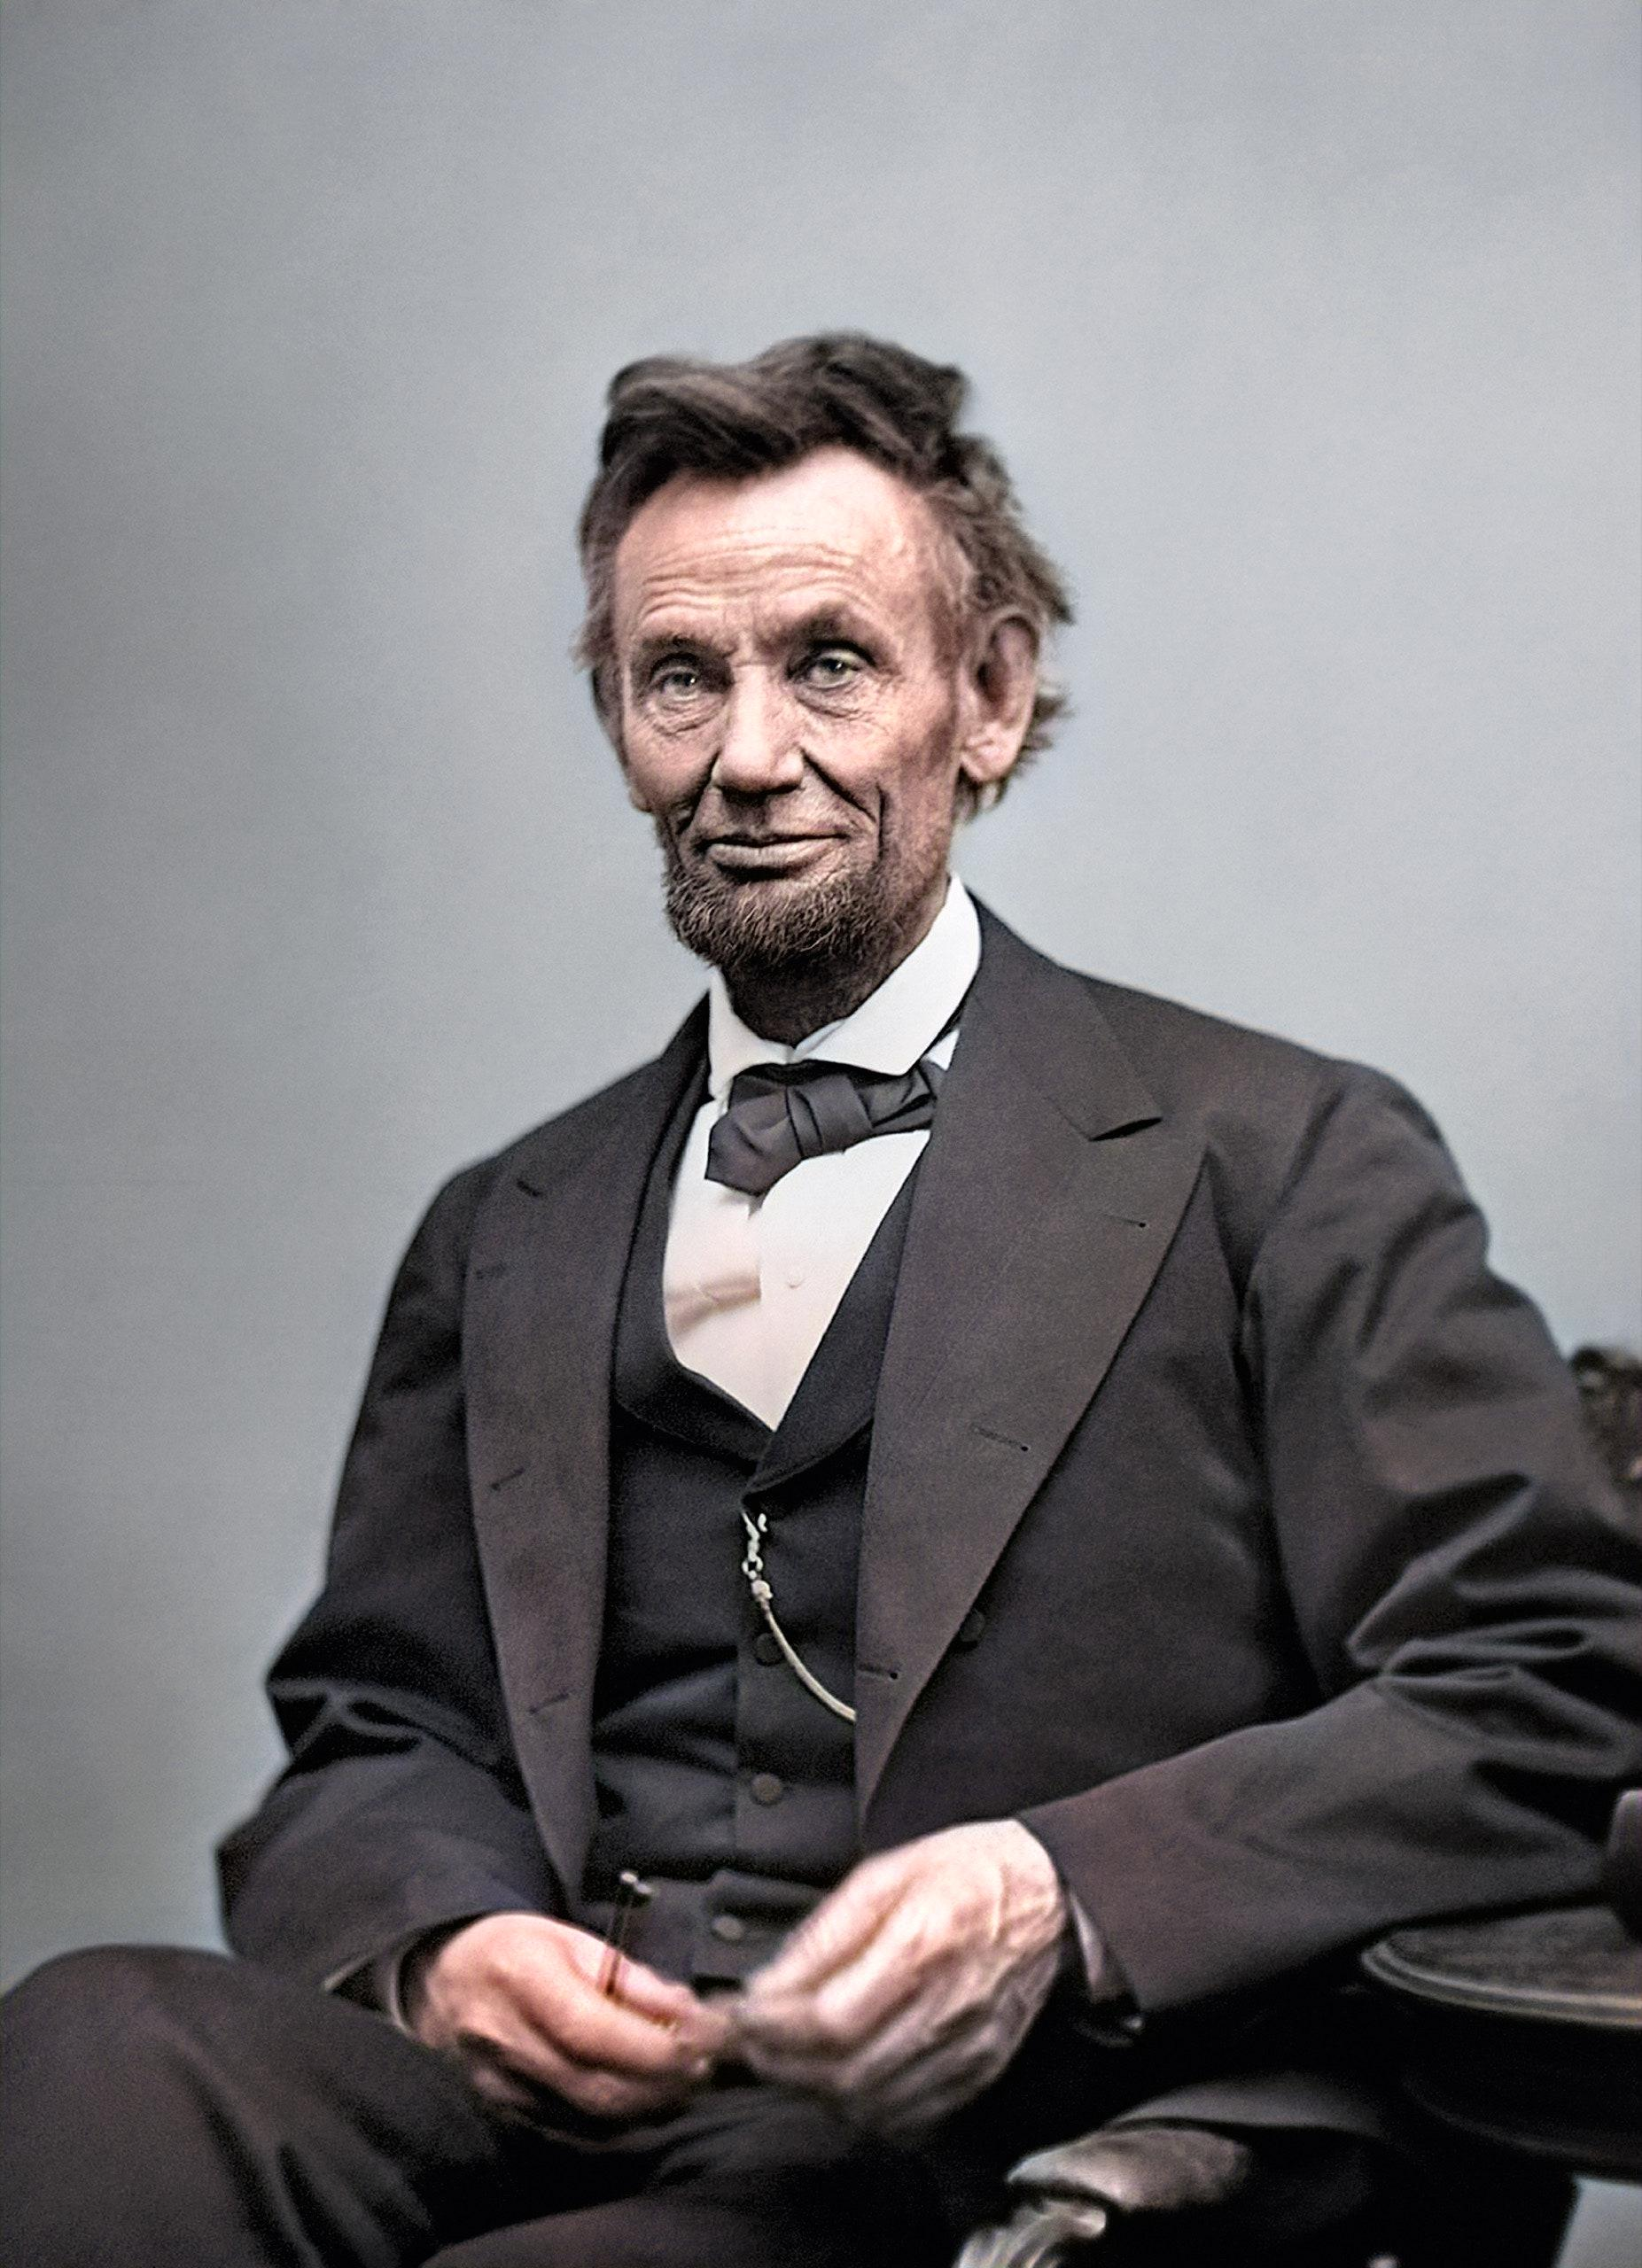

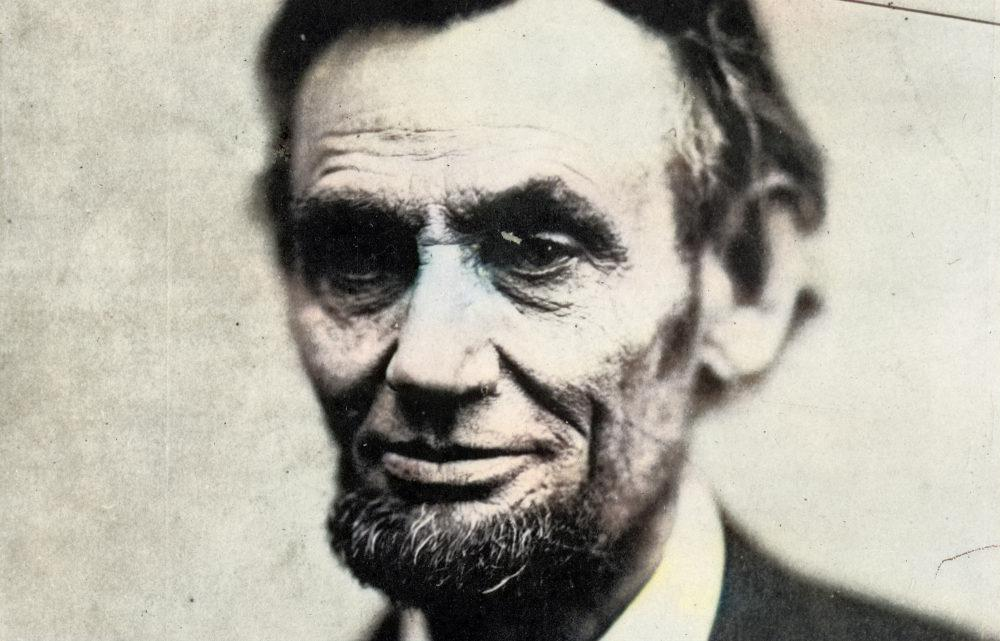

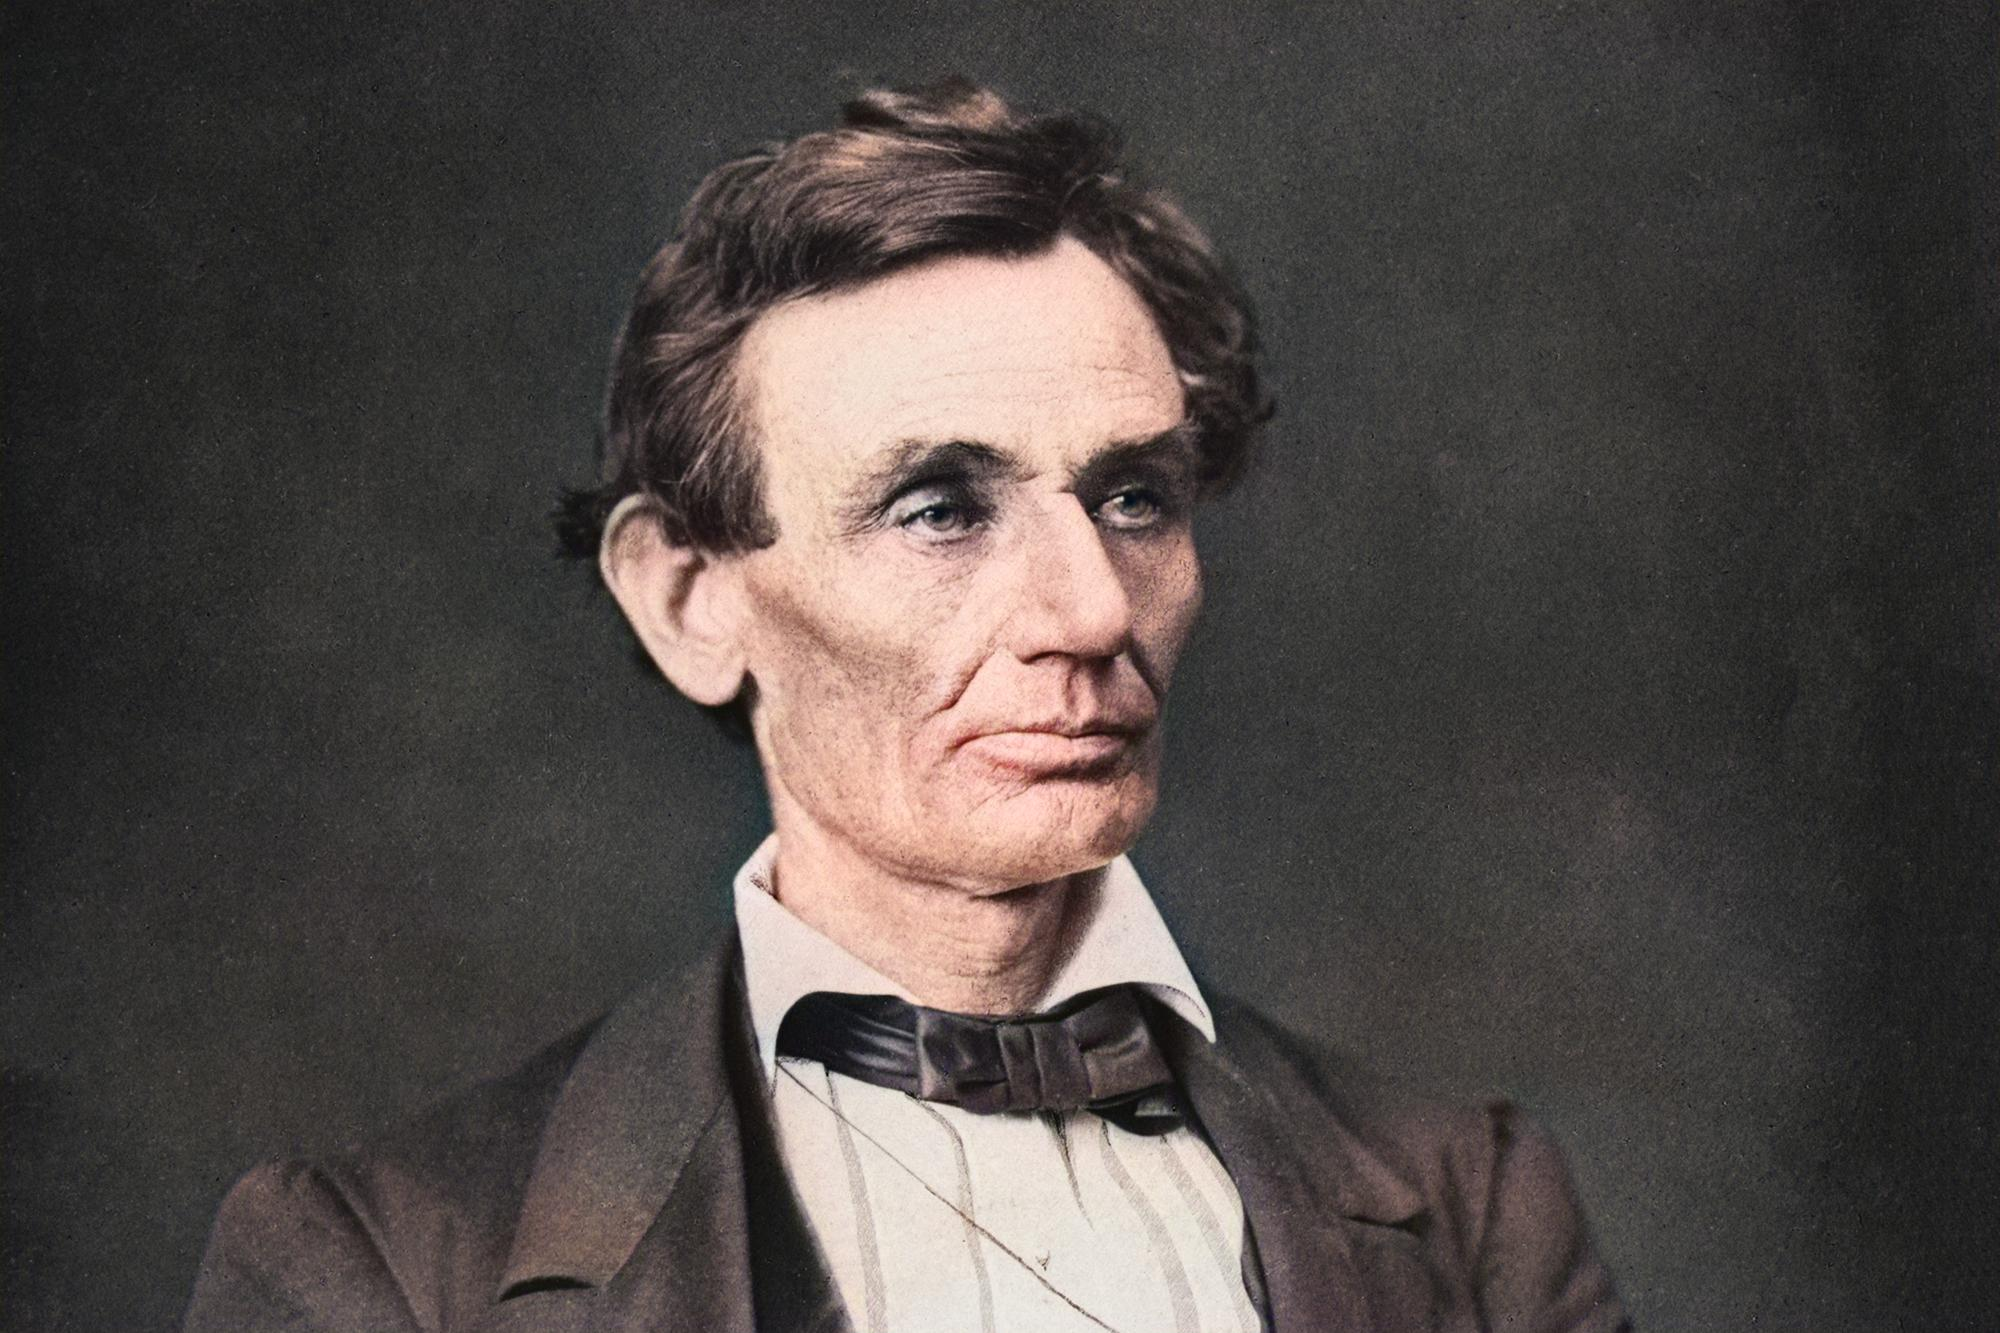

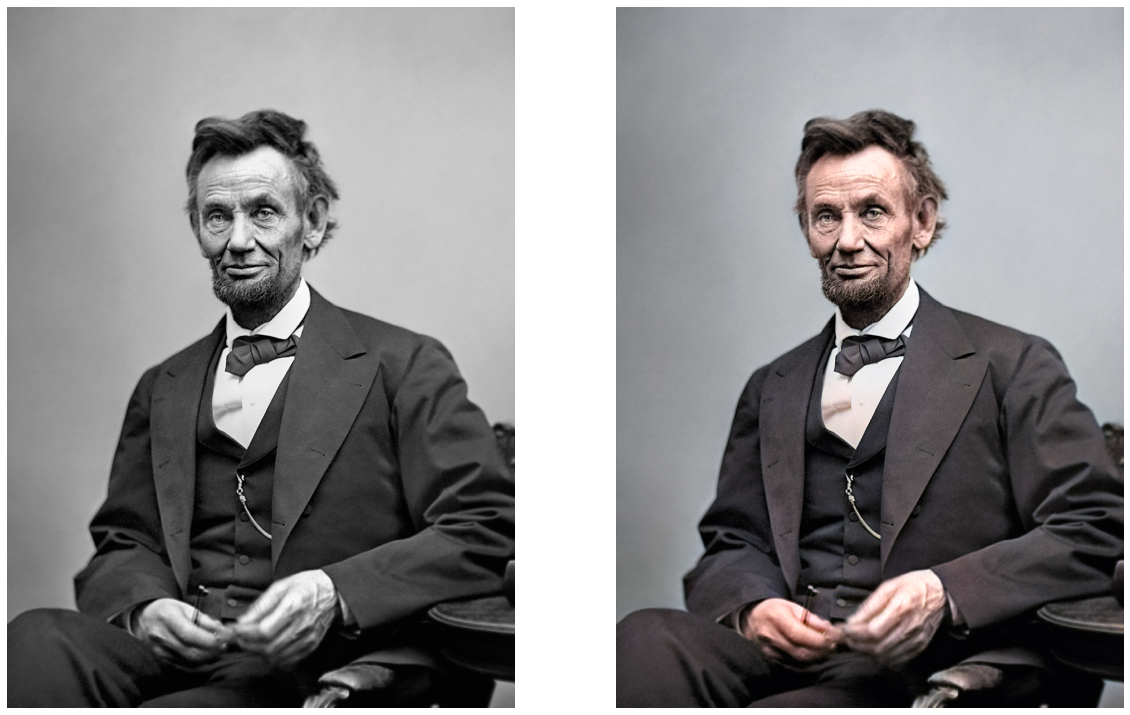

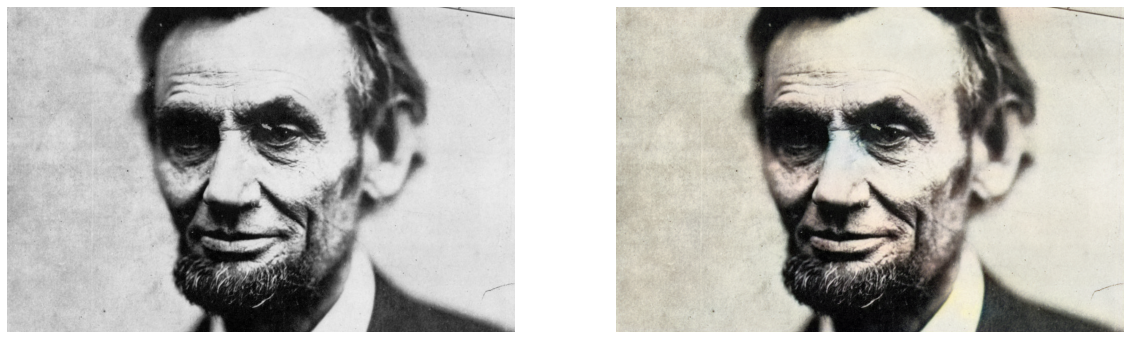

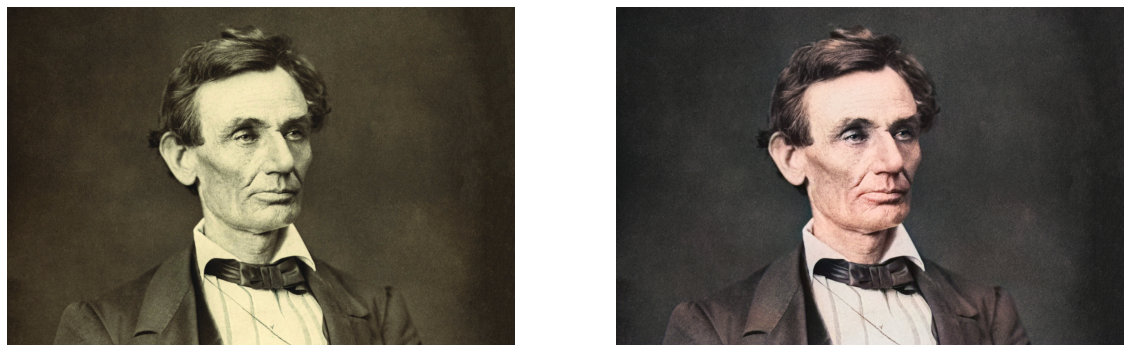

In [ ]:
import PIL
from PIL import Image

for image in image_files:
  os.chdir('/content/DeOldify')
  p= 'IMAGES/'+ image
  try:
    image_path = colorizer.plot_transformed_image(path=p, render_factor=40, compare=True, watermarked=False)
    show_image_in_notebook(image_path)
    picture = Image.open(image_path)
    os.chdir('/content/DeOldify/Export')
    picture = picture.save('COLORIZED_'+image)
  except:
    print(image + ' Is not a supported file type!')

In [ ]:
### CLEAR THE EXPORT FOLDER ###


'''
os.chdir('/content/DeOldify/Export/')
file_list = os.listdir()
for image in file_list:
  try:
    os.remove(image)
  except:
    os.rmdir(image)
'''

In [ ]:
### CLEAR IMPORT IMAGE FOLDER ###


'''
os.chdir('/content/DeOldify/IMAGES/')
file_list = os.listdir()
for image in file_list:
  try:
    os.remove(image)
  except:
    os.rmdir(image)
'''

In [ ]:
### CLEAR BOTH FOLDERS ###


'''
os.chdir('/content/DeOldify/Export/')
file_list = os.listdir()
for image in file_list:
  try:
    os.remove(image)
  except:
    os.rmdir(image)
os.chdir('/content/DeOldify/IMAGES/')
file_list = os.listdir()
for image in file_list:
  try:
    os.remove(image)
  except:
    os.rmdir(image)
'''

In [ ]:
### DELETE PESKY FOLDERS ###
### USE Linux Bash Commands ###


'''
!cd /content/DeOldify/IMAGES/
!rm -rf /content/DeOldify/IMAGES/DeOldify
'''